In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import numpy as np
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,confusion_matrix

In [2]:
df = pd.read_csv("IRIS.csv")  
df.shape

(150, 5)

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:>

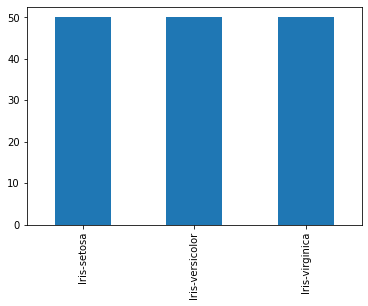

In [7]:
df['species'].value_counts().plot(kind = 'bar')

In [8]:
X = df.drop(['species'],axis = 1)
y = df['species']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [9]:
data_X = pd.DataFrame(X,columns = ['SL','SW','PL','PW'])
data_X.head()

,SL,SW,PL,PW
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [10]:
y.shape

(150,)

In [11]:
X.shape

(150, 4)

In [12]:
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [13]:
y_train.shape

(105,)

In [14]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
prediction = gnb_model.predict(X_test)

In [15]:
labels = ['Iris-setosa','Iris-versicolor', 'Iris-virginica']

In [16]:
from sklearn.metrics import classification_report
nb_acc = accuracy_score(prediction,y_test)
nb_precision = precision_score(prediction,y_test,average = 'macro')
nb_recall = recall_score(prediction,y_test,average = 'macro')
nb_f1_score = f1_score(prediction,y_test,average = 'macro')
cm = confusion_matrix(y_test,prediction,labels = labels)
cm_df = pd.DataFrame(cm,index = ['SETOSA','VERSICOLR','VIRGINICA'], 
                     columns = ['SETOSA','VERSICOLR','VIRGINICA'])
print(classification_report(y_test,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [17]:
print("Accuracy score: ",nb_acc)
print("Precision score: ",nb_precision)
print("Recall: ",nb_recall)
print("f1 score: ",nb_f1_score)

Accuracy score:  0.9333333333333333
Precision score:  0.9373219373219372
Recall:  0.9327731092436974
f1 score:  0.9343915343915343


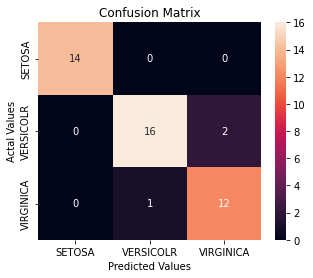

In [18]:
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [19]:
print("Calculation based on confusion matrix\n")
print('Outcome values : n',cm)

Calculation based on confusion matrix

Outcome values : n [[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [20]:
TP_0 = cm[0,0]
TP_1 = cm[1,1]
TP_2 = cm[2,2]
FN_0 = cm[0,1]+ cm[0,2]
FN_1 = cm[1,0] + cm[1,2]
FN_2 = cm[2,0] + cm[2,1]
FP_0 = cm[1,0] + cm[2,0]
FP_1 = cm[0,1] + cm[2,1]
FP_2 = cm[0,2] + cm[1,2]
TN_0 = cm[1,1] +cm[2,1]+ cm[2,2] +cm[1,2]
TN_1 = cm[0,0] + cm[0,2] +cm[2,0] + cm[2,2]
TN_2 = cm[0,0] + cm[0,1] + cm[1,0] + cm[1,1]

print('True positives for SETOSA,VERSICOLR,VIRGINICA:', TP_0,TP_1,TP_2)

True positives for SETOSA,VERSICOLR,VIRGINICA: 14 16 12


In [21]:
acc1 = (TP_0+TN_0)/(TP_0+TN_0+FP_0+FN_0)
print("Acc of setosa ", acc1)
acc2 = (TP_1+TN_1)/(TP_1+TN_1+FP_1+FN_1)
print("Acc of setosa ", acc2)
acc3 = (TP_2+TN_2)/(TP_2+TN_2+FP_2+FN_2)
print("Acc of setosa ", acc3)
avg_acc = (acc1+acc2+acc3)/3
print("Average accuracy:",avg_acc)

Acc of setosa  1.0
Acc of setosa  0.9333333333333333
Acc of setosa  0.9333333333333333
Average accuracy: 0.9555555555555556


In [22]:
prec1 = (TP_0)/(TP_0+FP_0)
print("Precision of setosa ", prec1)
prec2 = (TP_1)/(TP_1+FP_1)
print("Precision of setosa ", prec2)
prec3 = (TP_2)/(TP_2+FP_2)
print("Precision of setosa ", prec3)

Precision of setosa  1.0
Precision of setosa  0.9411764705882353
Precision of setosa  0.8571428571428571


In [23]:
rec1 = (TP_0)/(TP_0+FN_0)
print("Recall of setosa ", rec1)
rec2 = (TP_1)/(TP_1+FN_1)
print("Recall of setosa ", rec2)
rec3 = (TP_2)/(TP_2+FN_2)
print("Recall of setosa ", rec3)

Recall of setosa  1.0
Recall of setosa  0.8888888888888888
Recall of setosa  0.9230769230769231


In [24]:
f1score1 = 2*rec1*prec1/(rec1+prec1)
print("Recall of setosa ", f1score1)
f1score2 = 2*rec2*prec2/(rec2+prec2)
print("Recall of setosa ", f1score2)
f1score3 = 2*rec3*prec3/(rec3+prec3)
print("Recall of setosa ", f1score3)

Recall of setosa  1.0
Recall of setosa  0.9142857142857143
Recall of setosa  0.888888888888889


In [25]:
TP = TP_0+TP_1+TP_2
TN = TN_0+TN_1+TN_2
FP = FP_0+FP_1+FP_2
FN = FN_0+FN_1+FN_2
print("TP TN FP FN", TP,TN,FP,FN)

TP TN FP FN 42 87 3 3


In [26]:
accuracy = (TP+TN)/(TP+FP+TN+FN)
print(accuracy)

0.9555555555555556


In [27]:
precision = TP/(TP+FP)
print("Precision: ", precision)

Precision:  0.9333333333333333


In [28]:
recall = TP /(TP+FN)
print("Recall: ",recall)

Recall:  0.9333333333333333


In [29]:
error_rate = (FP+FN)/(TP+TN+FP+FN)
print("Error rate = ", error_rate)

Error rate =  0.044444444444444446


In [30]:
true_neg_rate = TN/(TN+FP)
false_pos_rate = FP/(TN+FP)
print("Specificity or true negative rate : ",true_neg_rate)
print("False positive rate : ",false_pos_rate)

Specificity or true negative rate :  0.9666666666666667
False positive rate :  0.03333333333333333


In [31]:
f1score = 2*(precision*recall)/(precision+recall)
print("F1-score: ",f1score)

F1-score:  0.9333333333333333


In [32]:
from sklearn.pipeline import Pipeline 


In [33]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [34]:

threshold = 3

X_new = df.drop(['species'],axis = 1)
y_new = df['species']
X_train1, X_test1, y_train1,y_test1 = train_test_split(X_new, y_new, test_size = .3, random_state = 42)

In [35]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier',GaussianNB())
]                
)

In [36]:
pipeline.fit(X_train1,y_train1)


Pipeline(steps=[('scaler', StandardScaler()), ('classifier', GaussianNB())])

In [37]:
pred = pipeline.predict(X_test1)


In [38]:
pnb_acc = accuracy_score(pred,y_test1)
pnb_precision = precision_score(pred,y_test1,average = 'macro')
pnb_recall = recall_score(pred,y_test1,average = 'macro')
pnb_f1_score = f1_score(pred,y_test1,average = 'macro')
pcm = confusion_matrix(pred,y_test1)

In [39]:
print("Accuracy score: ",pnb_acc)
print("Precision score: ",pnb_precision)
print("Recall: ",pnb_recall)
print("f1 score: ",pnb_f1_score)

Accuracy score:  0.9777777777777777
Precision score:  0.9743589743589745
Recall:  0.9761904761904763
f1 score:  0.974320987654321


<AxesSubplot:>

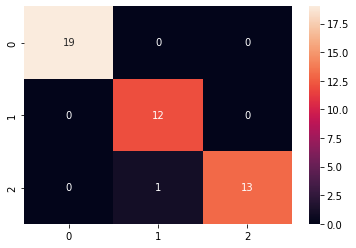

In [40]:
sns.heatmap(pcm,annot=True)
